# 분류 예제 : 캐글 신용카드 사기 검출

In [ ]:
Kaggle의 신용카드 데이터 세트를 이용해 신용카드 사기 검출 분류 실습
데이터 다운로드 : www.kaggle.com 검색
credit card fraud detection
creditcard.csv

신용카드 데이터 세트 특징
- 2013년 European Card 사용 트랜잭션을 가공해서 생성
- 불균형(Imbalanced)되어 있는 데이터 셋 284,807건의 데이터 중 492건이 Fraud(사기)

레이블인 Class 속성이 매우 불균형한 분포
- 0 값 : 정상 트랜잭선
- 1 값 : 사기 트랜잭션 (0.172 %)
    
일반적인 사기 검출(Fraud Detection)이나 이상 검출(Anomaly Detection)과 데이터 세트는  
레이블 값이 극도로 불균형한 분포를 이룸  
사기와 같은 이상 현상은 전체 데이터에서 차지하는 비중이 매우 적기 때문

In [ ]:
Credit Card Fraud Detection ML 모델 구척
- 다양한 Feature Engineering 방식을
- Rogistic Regression과 LightGBM 방식을 이용하ㅕ
- 각 방식에 적용 후 평가 비교

Feature Engineering
- 피처들 중 어떤 것이 모델링할 때 중요한 것인지 결정하는 과정
- 모델 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어서 상당히 중요한 단계
- 전문성과 시간, 비용이 많이 드는 작업
- PCA 방식 사용

PCA (Pricipal Component Analysis) : 주성분 분석
- 대표적인 차원 축소 알고리즘
- 여러 변수 간 존재하는 상관관계를 이용해
- 대표하는 주성분을 추출해서 차원을 축소하는 기법
- 간단하게 가장 높은 분산을 가지는 데이터의 축을 찾아 차원을 축소


차원 축소
- 많은 피처로 구성된 다차원 데이터 셋을
- 차원을 축소하여 새로운 차원의 데이터 셋을 생성하는 것


Feature Engineering 주요 작업
- 주요 Feature의 데이터 분포도 변경 : Log 변환
- 이상치 제거
- SMOTE 오버 샘플링

Log 변환
- 왜곡된 분포도를 가진 데이터 셋을
- 비교적 정규 분포에 가깝게 변환하는
- 피처 엔지니어링 방식

분포도가 왜곡되어 있다면 해결 방법은 로그 변환이 답
일반 수치 10, 100, 1000하면 10과 100 사이가 크지만
로그로하게 되면 log(10)은, log(100)은 2처럼
간극이 일정하기 때문에 
로그 변환을 이용하면 왜곡된 분포도를 쉽게 정규 변환 형태로 변경 가능

IQR(Inter Qunatile Range)를 이용한 이상치 제거

In [ ]:
# 그림30 IQR과 박스 플롯

In [ ]:
언더 샘플링과 오버 샘플링
- 레이블이 불균형한 분포를 가진 데이터 셋을 학습 시 예측 성능의 문제 발생
- 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적어
- 다양한 유형을 학습하지 못하고 일방적으로너무 많은 정상 레이블로 치우친 학습을 수행하기 때문에
- 제대로 된 이상 데이터 검출이 어려움

지도학습에서 극도로 불균형한 레이블 값 분포로 인한 문제점을 해결하기 위해서는
적절한 양의 학습 데이터를 확보해야 함
대표적으로 오버 샘플링과 언더 샘플링 방법 사용
오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아서 주로 사용


언더 샘플링
- 많은 레이블을 가진 데이터 셋을 적은 데이터 셋 수준으로 감소시키는 방식
- 너무 많은 정상 레이블 데이터를 감소시키기 때문에
- 정상 레이블의 경우 제대로 된 학습을 수행할 수 없다는 단점이 있어서
- 잘 적용하지 않음

오버 샘플링
- 적은 레이블을 가진 데이터 셋을 많은 데이터 셋 수준으로 증식시키는 방식
- 학습을 위한 충분한 데이터 확보
- 그러나 동일한 데이터를 단순히 증식하는 방법은 과적합이 되기 때문에 의미 없고
- 원본 데이터의 피처 값들을 약간만 변경해서 증식
- 대표적인 방법 SMOTE


In [ ]:
# 그림31 언더 샘플링 VS 오버 샘플링

In [ ]:
SMOTE (Synthetic Minority Over_sample Technique)
- 적은 데이터 세트에 있는 개별 데이터들의
- K 최근접 이웃을 찾아서
- K개 이웃들과의 차이를 일정 값으로 만들어서
- 기존 데이터와 약간 차이가 나는 새로운 데이터 생성하는 방식

In [ ]:
# 그림21 SMOTE 수행 절차

In [ ]:
신용카드 사기 검출 과정
(1) 데이터 일차 가공 및 모델 학습/예측/평가
(2) 중요 데이터 분포도 변환 후 모델 학습/예측/평가
(3) 이상치 데이터 제거 후 모델 학습/예측/평가
(4) SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [ ]:
(1) 데이터 일차 가공 및 모델 학습/예측/평가
- 데이터 로드

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [21]:
card_df = pd.read_csv('data/creditcard.csv')
card_df.head()

# Time : 크게 의미 있는 칼러은 아님. 데이터 만드는 데 걸린 시간 ; 나중에 삭제할 것임
# v1~v28 속성 : 피처 이름이 전혀 들어가 있지 않음
# kaggle에서 칼럼을 확인해보면
# 민감한 정보를 보호하기 위해서 PCA로 압축한 속성
# Amount : 카드 사용액
# Class : 0은 정상 사용, 1은 부정 카드 사용

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
card_df.shape 
# 284807 레코드(행, 건수)
# 31 피처와 타깃값(레이블값)

(284807, 31)

In [ ]:
원본 DataFrame은 유지하고 데이터 가공을 위한 DataFrame을 복사해서 사용

앞으로 처리할 기능을 함수로 작성
- 모델 특징 파악은 피처 엔지니어링을 하겠다는 것
- 데이터에 대해 로그 변환하고 아우라이어(이상치) 디텍션하고 오버 샘플링할 것임\
- 2개의 서로 다른 머신러닝 알고리즘에 적용 (LogisticRegression/LightGBM)
- 각각에 대해 예측 성능 평가
- 반복적으로 데이터 가공, 학습과 테스트 데이터 분리
- 학습/테스트/성능 평가하는 것을 계속 호출할 것이기 때문에 각 기능을 함수로 작성

In [22]:
# 전처리 함수
# Time 칼럼만 삭제
# 원본 데이터 유지하고, 복사본 반환

from sklearn.model_selection import train_test_split

# 전달 받은 DataFrame을 복사한 뒤 ime 칼럼 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [23]:
# 학습/테스트 데이터 셋을 반환하는 함수 
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    
    # 피처 데이터/ 레이블 데이터 셋 생성
    X_features = df_copy.iloc[:, :-1] # 피처 : 마지막 칼럼 전까지
    y_target = df_copy.iloc[:, -1] # 레이블(타깃) : 마지막 칼럼
    
    # 학습/테스트 데이터 셋 분할
    # stratify=y_target : 타깃 값의 분포도에 맞춰, 학습/테스트 데이터 분표 비율 맞춰서 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    return  X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [24]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)

print('\n테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

# 0과 1의 비율에 맞춰 학습 데이터와 테스트 데이터가 잘 분리되었음

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64

테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [25]:
# 예측 평가 수행 함수 (앞에서 복사해 올 것)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [26]:
# 먼저 LogisticRegression부터 학습/예측/평가 수행

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

# 결과
# 재현율이 낮게 나왔음
# 불균형한 데이터라서 재현율 부분을 중요하게 생각하면 되겠는데
# 재현율이 낮아서 예측 모델로 만족스럽지 못함

오차 행렬
[[85282    13]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081,    F1: 0.7171, AUC:0.9708


In [34]:
# 앞으로 피처 엔지니어링을 수행할 때마다
# 모델을 학습/예측/평가하는데 사용할 함수 작성

# 사이킷런의 Estimater객체, 학습/테스트 데이터 세트 입력 받아서
# 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgr_train=None, tgt_test=None):
    model.fit(ftr_train, tgr_train) # 학습
    pred = model.predict(ftr_test) # 예측(값)
    pred_proba = model.predict_proba(ftr_test)[:, 1] # 예측 확률
    get_clf_eval(tgt_test, pred, pred_proba)  # 실제 데이터, 예측값, 예측 확률

In [37]:
# pip install lightgbm

# LightGBM 이용해서 학습/예측/평가 수행
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=100, num_leaves=64, n_jobs=-1, \
                         boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

# LightGBM이 LogisticRegression보다 전반적으로 성능이 좋음
# 특히 정밀도와 재현율이 성능 많이 향상되었음

오차 행렬
[[85289     6]
 [   38   110]]
정확도: 0.9995, 정밀도: 0.9483, 재현율: 0.7432,    F1: 0.8333, AUC:0.9717


In [ ]:
# LogisticRegression 결과
오차 행렬
[[85282    13]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081,    F1: 0.7171, AUC:0.9708

In [ ]:
LightGBM
- XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광을 받고 있음
- 뛰어난 알고리즘이지만 학습 시간이 많이 빠른 편은 아님
- 가장 큰 장점 : XGBoost보다 학습 시간이 작다는 점
    - 메모리 사용량도 적고
    - 그런데 성능은 별 차이 없고
    - 기능은 좀 더 다양하고
- 한 가지 단점 : 적은 데이터 셋에 적용할 경우 과적합이 발생하기 쉽다는 것
    - 약 10,000 건 이하 정도(공식 문서에 기술되어 있음)
- 트리 기반이지만 균형 트리 분할 방식 사용
    - 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에
    - 트리 깊이가 최소화될 수 있음

In [ ]:
(2) 중요 데이터 분포도 변환 후 모델 학습/예측/평가

In [ ]:
중요 feature의 분포도 확인
- 가장 중요한 속성은?
- 중요한 것 중 하나는 Amount
- Amount가 금액이므로 카드 금액에 다라 실제 타깃 값에서
- 사기냐 정상이냐 판단하는데 중요 피처가 될 것이다

<AxesSubplot:xlabel='Amount', ylabel='Density'>

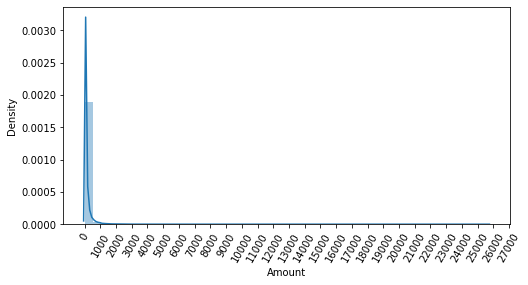

In [38]:
# 중요 속성(피처)으로 Amount 선정해서 분포도 확인

import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

# 대부분의 금액이 500 유로 미만인데
# 나머지 작은 값들이 존재 256000까지
# 불균형하게 가지고 있음
# 작은 값들이 길게 롱테일을 가지고 있는 구조

In [41]:
# 사전 데이터 가공 함수에 Amount 피처 변환 추가
# StandartScaler를 이용해서 정규분포 형태로 Amount 피처 변환

from sklearn.preprocessing import StandardScaler

# 전달 받은 DataFrame을 복사한 뒤 ime 칼럼 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    # Amount 칼럼 변환
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    
    # 변환된 Amount를 피처명 변경하고 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy
    

In [42]:
# LogistRegression / LightGBM 이용해서 학습/예측/평가 수행


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression(solver='liblinear')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, \
                         boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

# StandardScaler 변환 후 결과
# 로지스틱 회귀는 겅의 동일
# LightGBM은 정밀도와 재현율이 약간 향상됨
# 많이 차이는 없음

로지스틱 회귀 예측 성능
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9707
LightGBM 예측 성능
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


In [ ]:
# LogisticRegression 결과
오차 행렬
[[85282    13]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8738, 재현율: 0.6081,    F1: 0.7171, AUC:0.9708

In [ ]:
# LightGBM  결과
오차 행렬
[[85289     6]
 [   38   110]]
정확도: 0.9995, 정밀도: 0.9483, 재현율: 0.7432,    F1: 0.8333, AUC:0.9717

In [43]:
# Amount를 로그 변환

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 로그 변환 : 넘파이의 log1p() 이용하여 Amount 로그 변환
    # 넘파이의 로그 변환 함수는 mp.log()인데
    # 보통 로그 변환할 때 log() 잘 사용 안하고 log1p() 사용
    # 1p가 원 플러스로 하나를 더하겠다는 의미
    amount_n = np.log1p(df_copy['Amount'])    
    
    # 변환된 Amount를 피처명 변경하고 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

In [44]:
# Amount 로그 변환 후
# LogistRegression / LightGBM 이용해서 학습/예측/평가 수행


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression(solver='liblinear')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, \
                         boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

# Amount 로그 변환 결과
# 로지스틱 회귀 : 정밀도가 약간 향상됨

# LightGBM은 정밀도, 재현율 등 약간씩 성능 향상

로지스틱 회귀 예측 성능
오차 행렬
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081,    F1: 0.7200, AUC:0.9721
LightGBM 예측 성능
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


In [ ]:
# Amount 로그 변환 전 결과
로지스틱 회귀 예측 성능
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9707
LightGBM 예측 성능
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


In [ ]:
(3) 이상치 데이터 제거 후 모델 학습/예측/평가

각 피처즐의 상관 관계를 시각화 
결정 레이블인 class 값과 가장 상관도가 높은 피처 추출  
이 중에 상관도가 높은 피처들에 대해서 이상치 찾고  
이상치가 높은 피처들을 제거  

<AxesSubplot:>

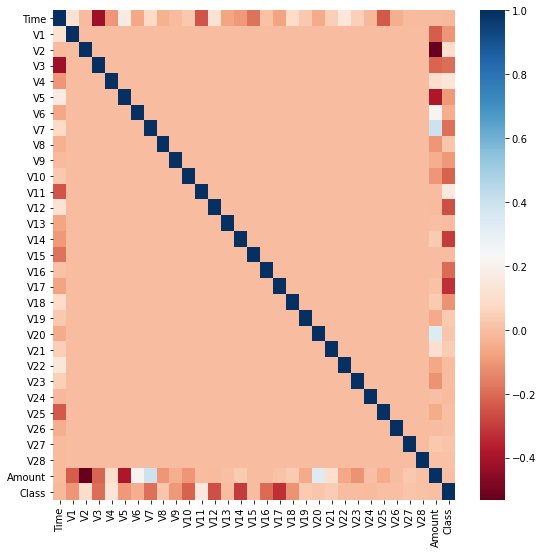

In [46]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = card_df.corr() # 각 칼럼들의 상관도 값 반환
sns.heatmap(corr, cmap="RdBu")

# 상관도 값을 직관적으로 이해할 수 있도록 시각적으로 표현
# 오른쪽 막대 색상 : 위쪽 파난색이 짙어질수록 양의 상관관계가 높음(1)
# 아래쪽 빨간색이 짙어질수록 음의 상관관계 높아짐(-1)
# 대각선 : 각 피처 값이 같으므로 당연히 1 (짙은 파란색)

# Class 값과 상관도가 높은 피처들 : x출에서 v12, v14, v17 (짙은 빨간색)
# 이 중에서 v14에 해당되는 이상치 확인

In [48]:
# 아웃라이어를 찾기 위한 함수 새로 생성

import numpy as np

# weight는 boxplot에서 이상치 계산시 1.5*IQR(몸통)을 더하고, 뺀 값들이 이상치
# 전체 데이터에서 찾지 않고 사기 데이터 (Class가 1인)에서 찾음
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column] # column 값으로 V14 들어올 것임
    quantile_25 = np.percentile(fraud.values, 25) # 1분위수
    quantile_75 = np.percentile(fraud.values, 75) # 3분위수
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25    

    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 데이터 프레임 인덱스 찾음
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index
    

In [49]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스 : ', outlier_index)

# 4개 인덱스 : 이 인덱스에 해당되는 행은 삭제할 것임

이상치 데이터 인덱스 :  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [50]:
# 로그 변환 + V14 피처의 이상치 데이터 삭제 후 모델들 재학습/예측/평가

def get_preprocessed_df(df=None):
    # 로그 변환
    df_copy = df.copy()   
    amount_n = np.log1p(df_copy['Amount'])   
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True) # axis=1 열
    
    # 이상치 데이터 삭제
    outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True) # axis=0 행
        
    return df_copy

In [51]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('로지스틱 회귀 예측 성능')
# lr_clf = LogisticRegression(solver='liblinear')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

print('LightGBM 예측 성능')
# lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, \
#                          boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgr_train=y_train, tgt_test=y_test)

# 이상치 제거 결과
# 로그 변환 후 결과보다 
# LightGBM이 전반적으로 성능 향상 보임
# 특히 재현율이 많이 향상된 것으로 보임

# 로지스틱 회귀 VS LightGBM
# LightGBM이 정밀도, 재현율, F1에서 좀 더 성능이 좋은 것으로 나타남

로지스틱 회귀 예측 성능
오차 행렬
[[85282    13]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8829, 재현율: 0.6712,    F1: 0.7626, AUC:0.9747
LightGBM 예측 성능
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


In [ ]:
# 로그 변환 후 결과
로지스틱 회귀 예측 성능
오차 행렬
[[85283    12]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8824, 재현율: 0.6081,    F1: 0.7200, AUC:0.9721
LightGBM 예측 성능
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796

In [ ]:
(4) SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [ ]:
SMOTE 방식을 제공하는 패키지 
imbalanced-learn 설치 필요
Anaconda Prompt 관리자 권한으로 실행시키고 설치

conda install -c conda-forge imbalanced-learn
중간에 y 입력

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

# train 데이터 셋으로 들어오는 값들에 대해서 오버 샘플링 
# 타깃값의 분포에 맞춰 피처값 생성
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ', X_train_over.shape, y_train_over.shape)

print('SMOTE 적용 후 레이블 값 분포\n', pd.Series(y_train_over).value_counts())

# 결과
# 적용 후 train 데이터가 많이 늘어남
# 적용 후 레이블 값 두 개가 동일 : (증식 되었음)
# 0    199020,  1    199020

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포
 0    199020
1    199020
Name: Class, dtype: int64


In [57]:
# 원래의 레이블 값 두 개 분포
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

In [60]:
# 증식된 데이터에 기반해서 로지스틱 회귀로 학습/예측/평가 수행

lr_clf = LogisticRegression(solver='liblinear')
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgr_train=y_train_over, tgt_test=y_test)

# 결과
# 재현율 : 상당히 좋아졌음
# 정밀도와 F1 스코어 : 엄청 떨어짐 (어이없는 수치)
# 이 모델을 실제 적용하기는 힘듦 : 정밀도가 너무 낮기 때문에 

오차 행렬
[[82932  2363]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0540, 재현율: 0.9247,    F1: 0.1021, AUC:0.9737


In [ ]:
# 이상치 제거 후 로지스틱 회귀 예측 성능
오차 행렬
[[85282    13]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8829, 재현율: 0.6712,    F1: 0.7626, AUC:0.9747

In [61]:
# 정밀도-재현율 곡선 시각화

# 앞에서 사용한 것 그대로 복사해서 사용

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

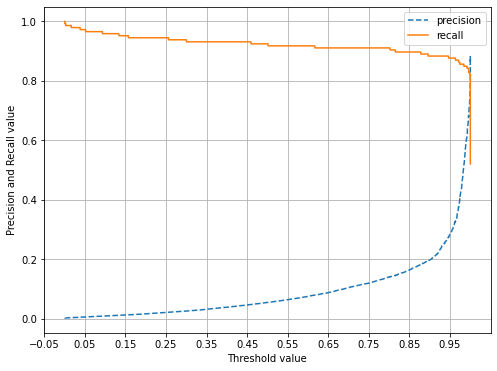

In [62]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])
# 재현율은 좋은데 정밀도가 너무 낮음 - 실제 적용하기 어려움
# 부적합한 모델

In [63]:
# LightGBM 모델 적용
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, \
                         boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgr_train=y_train_over, tgt_test=y_test)

# 결과
# 재현율은 약가 높아짐
# 정밀도 떨어짐
# 정밀도를 희생시켜서 재현율을 높이는 결과로 추출되었음
# LightGBM의 경우 전반적으로 향상되었고, 
# 특히 정밀도와 재현율을 상당한 수준으로 끌어 올릴 수 있었음

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814


In [ ]:
# 이상치 제거 후 결과
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780

In [ ]:
정확도: 0.9995, 정밀도: 0.9483, 재현율: 0.7432,    F1: 0.8333, AUC:0.9717

In [ ]:
# Amount 로그 변환 결과
# 로지스틱 회귀 : 정밀도가 약간 향상됨

# LightGBM은 정밀도, 재현율 등 약간씩 성능 향상

In [ ]:
# 이상치 제거 결과
# 로그 변환 후 결과보다 
# LightGBM이 전반적으로 성능 향상 보임
# 특히 재현율이 많이 향상된 것으로 보임

# 로지스틱 회귀 VS LightGBM
# LightGBM이 정밀도, 재현율, F1에서 좀 더 성능이 좋은 것으로 나타남

In [ ]:
# SMOTE 오버 샘플링 결과

# 재현율 : 상당히 좋아졌음
# 정밀도와 F1 스코어 : 엄청 떨어짐 (어이없는 수치)
# 이 모델을 실제 적용하기는 힘듦 : 정밀도가 너무 낮기 때문에 

 #결과
# 재현율은 약간 높아짐
# 정밀도 떨어짐
# 정밀도를 희생시켜서 재현율을 높이는 결과로 추출되었음
# LightGBM의 경우 전반적으로 향상되었고, 
# 특히 정밀도와 재현율을 상당한 수준으로 끌어 올릴 수 있었음

In [ ]:
각 케이스 별로 예측 성능 변화 확인
Amount 칼럼에 대해  로그 변환 후
- 로지스틱 회귀 : 정밀도 약간 좋아졌고, 재현율 동일
- LightGBM : 정밀도, 재현율 등 약간씩 성능 향상

이상치 제거 후 가장 성능이 좋아졌음 
- 사긴 데이터 건수 전체에서 4건 지웠음(?)
- 실제로 이상 제거는 효과는 가장 크다고 볼 수 있음 

SMOTE 오버 샘플링 결과
- 재현율이 좋아짐
- 로지스틱 회귀 : 정밀도가 많이 떨어짐
- LightGBM : 정밀도를 희생하더라도 재현율은 향상된 모델이 되었음
    
LightGBM의 경우 전반적으로 향상되었음